In [237]:
import types
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_data_1 = pd.read_csv("./EMGrenoble_CarPerformance_Data.csv")
df_data_1.head(10)



,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,American,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,American,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,American,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,American,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,American,amc ambassador dpl


# I. Exploring the Data

In [238]:
null = df_data_1.isna().describe()
null

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
count,406,406,406,406,406,406,406,406,406
unique,2,1,1,2,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,398,406,406,400,406,406,406,406,406


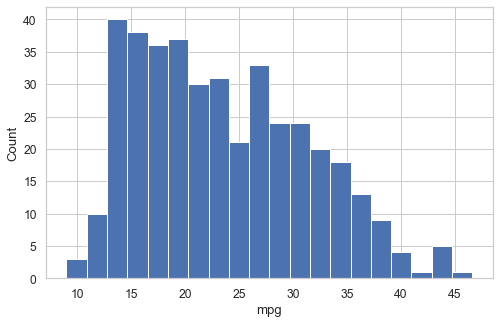

In [239]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_data_1['mpg'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='mpg', ylabel='Count');

In [240]:
noneff = df_data_1[df_data_1['mpg'] <= 23].shape[0]
eff = df_data_1[df_data_1['mpg'] > 23].shape[0]
print((noneff , eff))

(207, 191)


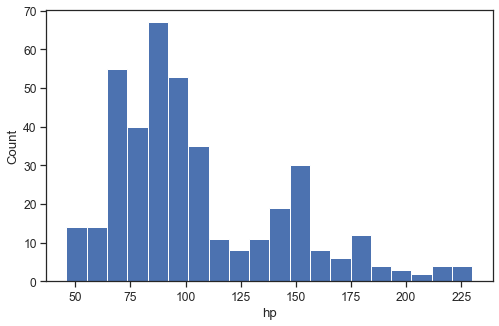

In [241]:
sns.set(style='ticks', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_data_1['horsepower'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='hp', ylabel='Count');

In [242]:
horse_missing = df_data_1[df_data_1["horsepower"].isna()]
horse_missing

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
28,25.0,4,98.0,NaN,2046,19.0,71,American,ford pinto
95,21.0,6,200.0,NaN,2875,17.0,74,American,ford maverick
220,23.6,4,140.0,NaN,2905,14.3,80,American,ford mustang cobra
241,23.0,4,151.0,NaN,3035,20.5,82,American,amc concord dl
317,40.9,4,85.0,NaN,1835,17.3,80,European,renault lecar deluxe
321,34.5,4,100.0,NaN,2320,15.8,81,European,renault 18i


In [243]:
for n in range(1,10):
    df_data_1.loc[(5*n < df_data_1['mpg']) & (df_data_1['mpg'] <= 5*(n+1)) & (df_data_1['horsepower'].isnull())  , 'horsepower'] = df_data_1.loc[(5*n < df_data_1['mpg']) & (df_data_1['mpg'] < 5*(n+1)) , 'horsepower'].mean()



In [244]:
df_data_1.loc[321,"horsepower"]

72.70833333333333

In [245]:
df_data_1.describe()

,mpg,cylinders,engine,horsepower,weight,acceleration,year
count,398.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,104.785113,2979.413793,15.519704,75.921182
std,7.815984,1.712160,104.922458,38.598292,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,105.000000,75.250000,2226.500000,13.700000,73.000000
50%,23.000000,4.000000,151.000000,94.833333,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<AxesSubplot:xlabel='origin', ylabel='count'>

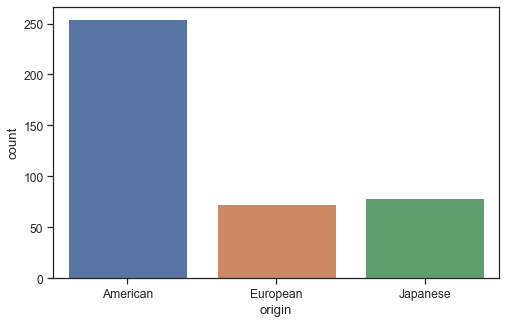

In [246]:
sns.countplot(df_data_1['origin'])


In [247]:
Amr = df_data_1[df_data_1['mpg'] > 23][df_data_1["origin"]=="American"].shape[0]/eff
Europe = df_data_1[df_data_1['mpg'] > 23][df_data_1["origin"]=="European"].shape[0]/eff
jap = df_data_1[df_data_1['mpg'] > 23][df_data_1["origin"]=="Japanese"].shape[0]/eff


<ipython-input-247-86130c6b3b7c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Amr = df_data_1[df_data_1['mpg'] > 23][df_data_1["origin"]=="American"].shape[0]/eff
<ipython-input-247-86130c6b3b7c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Europe = df_data_1[df_data_1['mpg'] > 23][df_data_1["origin"]=="European"].shape[0]/eff
<ipython-input-247-86130c6b3b7c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jap = df_data_1[df_data_1['mpg'] > 23][df_data_1["origin"]=="Japanese"].shape[0]/eff


In [248]:
print("propotion of American cars from overall efficient cars: " , Amr)
print("propotion of Europe cars from overall efficient cars: " , Europe)
print("propotion of Japan cars from overall efficient cars: " , jap)

propotion of American cars from overall efficient cars:  0.3612565445026178
propotion of Europe cars from overall efficient cars:  0.2774869109947644
propotion of Japan cars from overall efficient cars:  0.3612565445026178


In [295]:
sns.scatterplot( x="engine", y="mpg",data=df_data_1, hue="efficiency")


<AxesSubplot:xlabel='engine', ylabel='mpg'>

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 576x360 with 1 Axes>

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

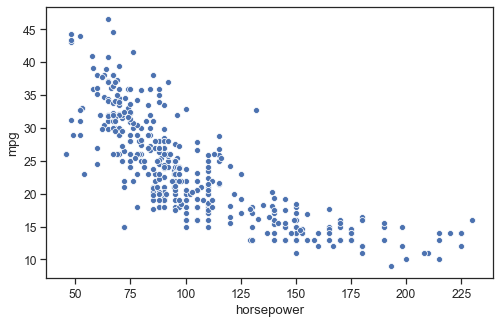

In [285]:
sns.scatterplot(data=df_data_1, x="horsepower", y="mpg")

<AxesSubplot:xlabel='weight', ylabel='mpg'>

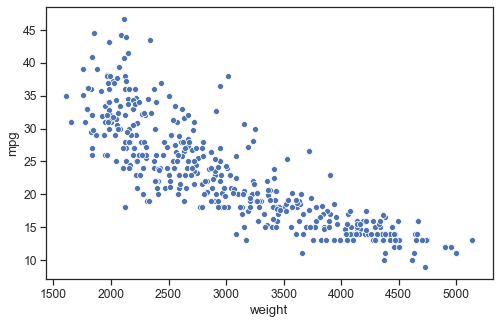

In [286]:
sns.scatterplot(data=df_data_1, x="weight", y="mpg")

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

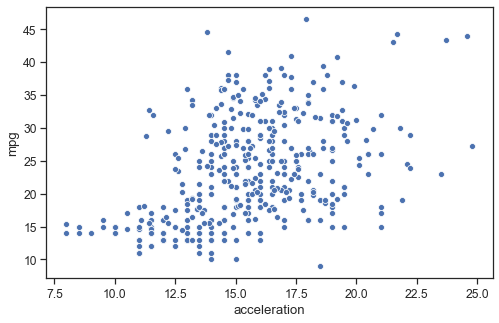

In [287]:
sns.scatterplot(data=df_data_1, x="acceleration", y="mpg")

# II. Feature Engineering

## 1. Define Target

In [253]:
#df_data_1["mpg"].fillna(df_data_1["mpg"].mean(), inplace=True)

for n in range(1,12):
    df_data_1.loc[(38.7*n < df_data_1['engine']) & (df_data_1['engine'] <= 38.7*(n+1)) & (df_data_1['mpg'].isnull())  , 'mpg'] = df_data_1.loc[(38.7*n < df_data_1['engine']) & (df_data_1['engine'] <= 38.7*(n+1)) , 'mpg'].mean()


In [254]:
mpg_missing = df_data_1[df_data_1["mpg"].isna()]
mpg_missing

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name


In [255]:
df_data_1["efficiency"] = 0

def efficient(n):
    if df_data_1.loc[n,"mpg"] > 23:
        df_data_1.loc[n,"efficiency"] = 1
        
for n in range(406):
    efficient(n)

In [256]:
df_data_1

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name,efficiency
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla,1
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic,1
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto),1
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx,1


In [257]:
df_data_1["efficiency"].value_counts()

0    212
1    194
Name: efficiency, dtype: int64

In [258]:
df_data_1["mpg"].mean()

23.43801398637117

## 2. Format predictive columns

<AxesSubplot:xlabel='origin', ylabel='mpg'>

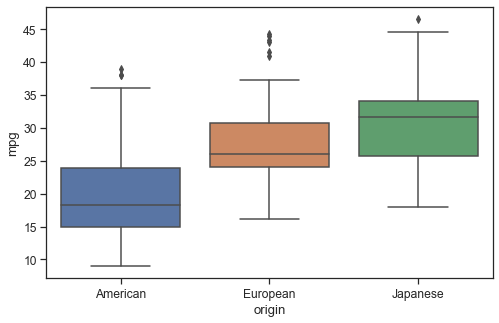

In [259]:
df_data_1["cylinders"].value_counts()
sns.boxplot(x='origin', y='mpg', data=df_data_1)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

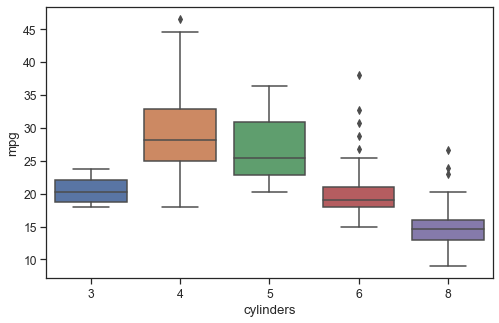

In [260]:
 sns.boxplot(x='cylinders', y='mpg', data=df_data_1)

In [261]:
mapper = {4:5, 5:4, 3:3, 6:2, 8:1}

df_data_1["cyli"]=df_data_1["cylinders"].map(mapper)

df_data_1

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name,efficiency,cyli
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,0,1
...,...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla,1,5
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic,1,5
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto),1,5
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx,1,5


<AxesSubplot:xlabel='year', ylabel='mpg'>

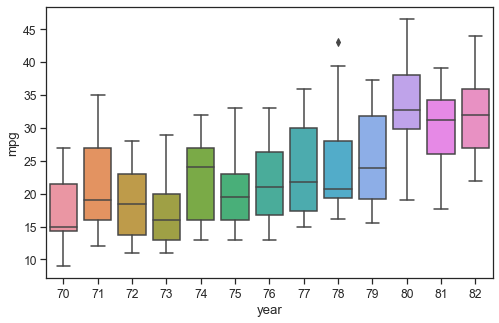

In [262]:
 sns.boxplot(x='year', y='mpg', data=df_data_1)

In [263]:
df_data_1["date"] = df_data_1["year"] - min(df_data_1["year"]) + 1

In [264]:
df_data_1

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name,efficiency,cyli,date
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,0,1,1
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,0,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,0,1,1
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,0,1,1
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla,1,5,13
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic,1,5,13
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto),1,5,13
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx,1,5,13


In [265]:
import sklearn
from sklearn.preprocessing import *

In [266]:
minmax = sklearn.preprocessing.MinMaxScaler()

df_data_1["normalized_engine"] = pd.DataFrame(minmax.fit_transform(df_data_1[["engine"]]))
df_data_1["normalized_horsepower"] = pd.DataFrame(minmax.fit_transform(df_data_1[["horsepower"]]))
df_data_1["normalized_weight"] = pd.DataFrame(minmax.fit_transform(df_data_1[["weight"]]))

df_data_1

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name,efficiency,cyli,date,normalized_engine,normalized_horsepower,normalized_weight
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,0,1,1,0.617571,0.456522,0.536150
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,0,1,1,0.728682,0.646739,0.589736
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,0,1,1,0.645995,0.565217,0.516870
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,0,1,1,0.609819,0.565217,0.516019
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,0,1,1,0.604651,0.510870,0.520556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla,1,5,13,0.103359,0.130435,0.179189
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic,1,5,13,0.059432,0.114130,0.099802
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto),1,5,13,0.059432,0.114130,0.099802
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx,1,5,13,0.059432,0.114130,0.108307


In [267]:
dataset = pd.get_dummies(df_data_1, columns=['origin'])

In [268]:
dataset

,mpg,cylinders,engine,horsepower,weight,acceleration,year,name,efficiency,cyli,date,normalized_engine,normalized_horsepower,normalized_weight,origin_American,origin_European,origin_Japanese
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,1,1,0.617571,0.456522,0.536150,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,1,1,0.728682,0.646739,0.589736,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,1,1,0.645995,0.565217,0.516870,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,1,1,0.609819,0.565217,0.516019,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,1,1,0.604651,0.510870,0.520556,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,toyota corolla,1,5,13,0.103359,0.130435,0.179189,0,0,1
402,38.0,4,91.0,67.0,1965,15.0,82,honda civic,1,5,13,0.059432,0.114130,0.099802,0,0,1
403,32.0,4,91.0,67.0,1965,15.7,82,honda civic (auto),1,5,13,0.059432,0.114130,0.099802,0,0,1
404,38.0,4,91.0,67.0,1995,16.2,82,datsun 310 gx,1,5,13,0.059432,0.114130,0.108307,0,0,1


In [269]:
dataset = dataset.iloc[:,8:]
dataset

,efficiency,cyli,date,normalized_engine,normalized_horsepower,normalized_weight,origin_American,origin_European,origin_Japanese
0,0,1,1,0.617571,0.456522,0.536150,1,0,0
1,0,1,1,0.728682,0.646739,0.589736,1,0,0
2,0,1,1,0.645995,0.565217,0.516870,1,0,0
3,0,1,1,0.609819,0.565217,0.516019,1,0,0
4,0,1,1,0.604651,0.510870,0.520556,1,0,0
...,...,...,...,...,...,...,...,...,...
401,1,5,13,0.103359,0.130435,0.179189,0,0,1
402,1,5,13,0.059432,0.114130,0.099802,0,0,1
403,1,5,13,0.059432,0.114130,0.099802,0,0,1
404,1,5,13,0.059432,0.114130,0.108307,0,0,1


# III. Model Selection

## 1. Decision Trees

In [272]:
all_classes = dataset["efficiency"]
all_inputs = dataset.iloc[:,1:]

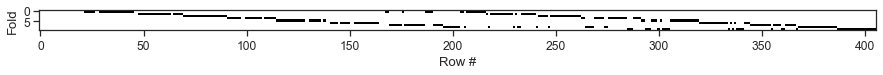

In [224]:
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_classes)

In [225]:
null = dataset.isna().describe()
null

,efficiency,cyli,date,normalized_engine,normalized_horsepower,normalized_weight,origin_American,origin_European,origin_Japanese
count,406,406,406,406,406,406,406,406,406
unique,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,406,406,406,406,406,406,406,406,406


Text(0.5, 1.0, 'Average score: 0.8241463414634145')

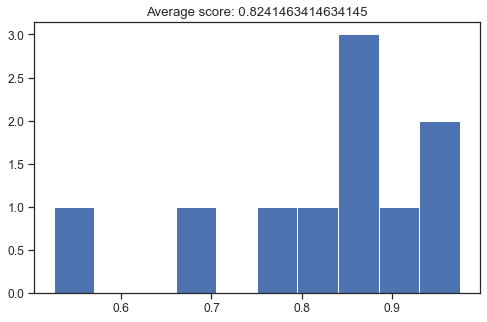

In [226]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [227]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8934756097560974
Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 4, 'splitter': 'best'}


In [228]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=4)

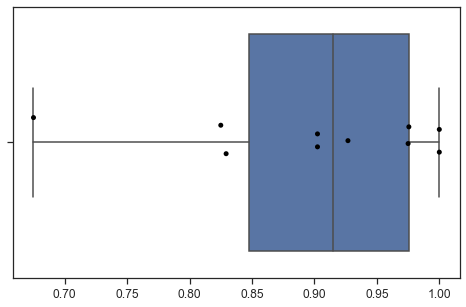

In [229]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black') ;

## 2. Random Forests

In [230]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.8737195121951219
Best parameters: {'criterion': 'gini', 'max_features': 2, 'n_estimators': 10}


RandomForestClassifier(max_features=2, n_estimators=10)

<AxesSubplot:xlabel='classifier', ylabel='accuracy'>

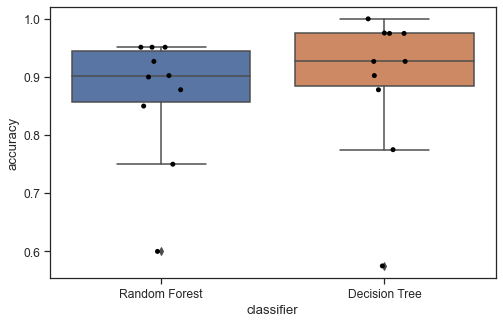

In [231]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sns.boxplot(x='classifier', y='accuracy', data=both_df)
sns.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')

## 3. logistic regression

Best score: 0.8766463414634146
Best parameters: {'C': 0.1, 'solver': 'newton-cg'}


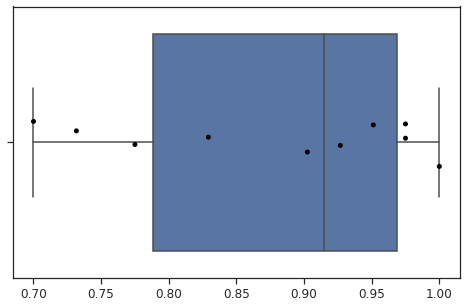

In [102]:
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression()

parameter_grid = {'C': [1.0, 2.0, 0.5, 0.01,0.1],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                  }

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(logistic_regression_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


logistic_regression_classifier = grid_search.best_estimator_
logistic_regression_classifier

dt_scores = cross_val_score(logistic_regression_classifier, all_inputs, all_classes, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black') ;

## 4. Gaussian Process Classifier

Best score: 0.803170731707317
Best parameters: {'warm_start': True}


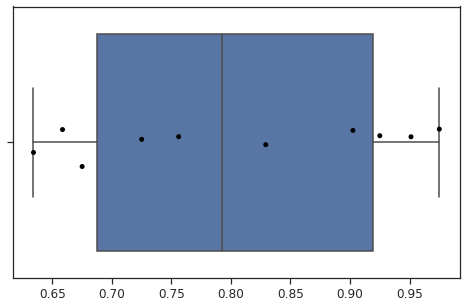

In [104]:
from sklearn.gaussian_process import GaussianProcessClassifier

gaussian_process_classifier = GaussianProcessClassifier()

parameter_grid = {'warm_start': [True, False]
                  }

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(gaussian_process_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


gaussian_process_classifier = grid_search.best_estimator_
gaussian_process_classifier

dt_scores = cross_val_score(gaussian_process_classifier, all_inputs, all_classes, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black') ;

## 5. XGBoost

Best score: 0.8765243902439023
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6}


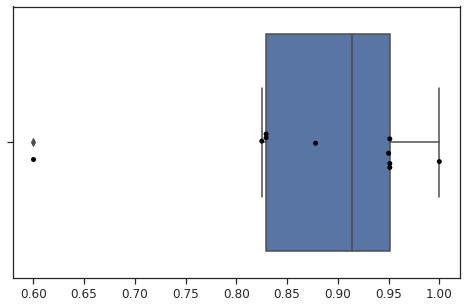

In [105]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

parameter_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
                  }

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(xgb,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


xgb = grid_search.best_estimator_
xgb

dt_scores = cross_val_score(xgb, all_inputs, all_classes, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black') ;

## 6. Neural Network

### 6.1 Tune Batch Size and Number of Epochs

In [130]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(all_inputs, all_classes)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.898929 using {'batch_size': 10, 'epochs': 100}
0.803341 (0.111988) with: {'batch_size': 10, 'epochs': 10}
0.876707 (0.040501) with: {'batch_size': 10, 'epochs': 50}
0.898929 (0.030627) with: {'batch_size': 10, 'epochs': 100}
0.815505 (0.072425) with: {'batch_size': 20, 'epochs': 10}
0.849619 (0.049149) with: {'batch_size': 20, 'epochs': 50}
0.891521 (0.030065) with: {'batch_size': 20, 'epochs': 100}
0.630410 (0.054516) with: {'batch_size': 40, 'epochs': 10}
0.896460 (0.030441) with: {'batch_size': 40, 'epochs': 50}
0.879176 (0.039112) with: {'batch_size': 40, 'epochs': 100}
0.475980 (0.177978) with: {'batch_size': 60, 'epochs': 10}
0.476362 (0.313123) with: {'batch_size': 60, 'epochs': 50}
0.866830 (0.048232) with: {'batch_size': 60, 'epochs': 100}
0.468954 (0.280196) with: {'batch_size': 80, 'epochs': 10}
0.614488 (0.341256) with: {'batch_size': 80, 'epochs': 50}
0.604611 (0.333951) with: {'batch_size': 80, 'epochs': 100}
0.538453 (0.314746) with: {'batch_size': 100, 'epochs':

In [132]:
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(all_inputs, all_classes)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.896460 using {'optimizer': 'Nadam'}
0.891521 (0.033517) with: {'optimizer': 'SGD'}
0.884114 (0.035150) with: {'optimizer': 'RMSprop'}
0.545861 (0.308698) with: {'optimizer': 'Adagrad'}
0.464960 (0.218046) with: {'optimizer': 'Adadelta'}
0.893991 (0.028166) with: {'optimizer': 'Adam'}
0.874237 (0.042566) with: {'optimizer': 'Adamax'}
0.896460 (0.033855) with: {'optimizer': 'Nadam'}


In [135]:
from keras.optimizers import SGD

def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(all_inputs, all_classes)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.911275 using {'learn_rate': 0.1, 'momentum': 0.0}
0.876797 (0.028117) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.690541 (0.255197) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.810585 (0.072964) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.866993 (0.024197) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.871768 (0.043984) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.869299 (0.046025) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.807571 (0.116985) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.861892 (0.068152) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.842139 (0.079124) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.898929 (0.030627) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.908805 (0.018696) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.898929 (0.027480) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.911275 (0.018345) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.903867 (0.032155) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.884078 (0.045974) with: {'learn_rate': 0

In [137]:
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(all_inputs, all_classes)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.898929 using {'init_mode': 'he_normal'}
0.889052 (0.032231) with: {'init_mode': 'uniform'}
0.884114 (0.037173) with: {'init_mode': 'lecun_uniform'}
0.886583 (0.034614) with: {'init_mode': 'normal'}
0.236855 (0.167241) with: {'init_mode': 'zero'}
0.889052 (0.036489) with: {'init_mode': 'glorot_normal'}
0.874237 (0.043836) with: {'init_mode': 'glorot_uniform'}
0.898929 (0.030627) with: {'init_mode': 'he_normal'}
0.891521 (0.030065) with: {'init_mode': 'he_uniform'}


In [141]:
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='he_normal', activation=activation))
    model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(all_inputs, all_classes)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.901398 using {'activation': 'softsign'}
0.886583 (0.034614) with: {'activation': 'softmax'}
0.881645 (0.049677) with: {'activation': 'softplus'}
0.901398 (0.024658) with: {'activation': 'softsign'}
0.889052 (0.032231) with: {'activation': 'relu'}
0.891521 (0.036645) with: {'activation': 'tanh'}
0.881645 (0.037995) with: {'activation': 'sigmoid'}
0.881645 (0.037995) with: {'activation': 'hard_sigmoid'}
0.886583 (0.034614) with: {'activation': 'linear'}


In [144]:
from keras.constraints import maxnorm
from keras.layers import Dropout

def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='he_normal', activation='softsign', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='he_normal', activation='softsign'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(all_inputs, all_classes)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.864379 using {'dropout_rate': 0.2, 'weight_constraint': 2}
0.557843 (0.343315) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.777977 (0.173671) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.849619 (0.039214) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.847077 (0.072856) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.778014 (0.138531) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.805428 (0.036397) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.619916 (0.326102) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.637491 (0.311077) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.612509 (0.294575) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.768137 (0.161847) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.674328 (0.231264) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.864379 (0.044833) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.788017 (0.096318) with: {'dropout_rate': 0.2, 'weight_constraint': 

In [143]:
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, kernel_initializer='he_normal', activation='softsign', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(all_inputs, all_classes)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.896460 using {'neurons': 25}
0.664361 (0.349785) with: {'neurons': 1}
0.876707 (0.040501) with: {'neurons': 5}
0.874237 (0.042134) with: {'neurons': 10}
0.889052 (0.036489) with: {'neurons': 15}
0.889052 (0.033890) with: {'neurons': 20}
0.896460 (0.026593) with: {'neurons': 25}
0.876707 (0.040501) with: {'neurons': 30}


### 6.2 The NN model

In [288]:
# define the keras model
model = Sequential()
model.add(Dense(25, input_dim=8,  kernel_initializer='he_normal', activation='softsign',kernel_constraint=maxnorm(2)))
optimizer = SGD(lr=0.1, momentum=0.0)
model.add(Dense(8,kernel_initializer='he_normal',  activation='softsign'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(all_inputs, all_classes, epochs=100, batch_size=10, verbose=0)
# evaluate the keras model
accuracy = model.evaluate(all_inputs, all_classes, verbose=0)
print('Accuracy:' ,  (accuracy[1]*100))

Accuracy: 95.07389068603516


In [293]:
from sklearn.model_selection import KFold

num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(all_inputs, all_classes):
    model = Sequential()
    model.add(Dense(25, input_dim=8,  kernel_initializer='he_normal', activation='softsign',kernel_constraint=maxnorm(2)))
    optimizer = SGD(lr=0.1, momentum=0.0)
    model.add(Dense(8,kernel_initializer='he_normal',  activation='softsign'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    model.fit(all_inputs, all_classes, epochs=100, batch_size=10, verbose=0)

    # Generate generalization metrics
    accuracy = model.evaluate(all_inputs, all_classes, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {accuracy[0]}; {model.metrics_names[1]} of {accuracy[1]*100}%')
    acc_per_fold.append(accuracy[1] * 100)
    loss_per_fold.append(accuracy[0])

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.14048264920711517; accuracy of 95.56650519371033%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.1438922882080078; accuracy of 94.08866763114929%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.1405504196882248; accuracy of 94.33497786521912%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.1396765559911728; accuracy of 95.3201949596405%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.14674828946590424; accuracy of 93.84236335754395%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.1479